# **Hands-on**
Reconhecimento de atividades humanas

Esse tutorial tem como objetivo desenvolver um código para realizar o reconhecimento de atividades humanas (Human Activity Recognition - HAR).


# Resumo
### 1- Apresentação do Colaboratory
### 2- Dataset
### 3- Pré Processamento de dados
### 4- Separação de dados de treinamento e Teste
### 5- Normalização / Padronização
### 6- PCA / LDA


## Dataset

Dataset que inclui dados de **séries temporais gerados por sensores de acelerômetro e giroscópio** (atitude, gravidade, userAcceleration e rotationRate). 

Coletado com um iPhone 6s mantido no bolso frontal do participante usando o **SensingKit**, que coleta informações da estrutura Core Motion em dispositivos iOS. Todos os dados coletados em taxa de **amostragem de 50Hz**. 

Um total de **24 participantes** em uma faixa de gênero, idade, peso e altura realizaram **6 atividades em 15 tentativas** no mesmo ambiente e condições: subir escada, descer escada, caminhar, correr, sentar e ficar em pé. 

Proposta de **inferir gênero ou personalidade dos titulares dos dados**, **além de suas atividades.**


---

Foram coletados informações como idade, sexo, altura e peso e utilizado um smartphone (iPhone 6) armazenado no bolso da frente da calça durante o experimento. Todos os participantes foram convidados a usar sapatos baixos.

Os participantes realizaram 6 atividades diferentes (descer as escadas, subir as escadas, sentar, ficar de pé e correr) ao redor do campus **Queen Mary University of London's Mile End**. 

O participante é reponsavel por apertar o botão iniciar do aplicativo **Crowdsense**, para iniciar o experimento, realizando da forma mais natural possível, como no dia a dia. No final de cada tentativa apertavam o botão de parar. Os locais e rotas exatos para execução de todas as atividades são mostrados no mapa ilustrativo da Figura a seguir.


<img src="https://github.com/mmalekzadeh/motion-sense/raw/master/materials/e_map.png"></img>

**Kaggle:** https://www.kaggle.com/malekzadeh/motionsense-dataset

**Github:** https://github.com/mmalekzadeh/motion-sense

**Github Deep:** https://github.com/mmalekzadeh/dana


# Aquisição dos Dados (Dataset)

In [ ]:
#from urllib.request import urlretrieve
import os 
url = "https://github.com/mmalekzadeh/motion-sense/blob/261cb0d60611a049ab38127738e42cc510ed50f4/data/A_DeviceMotion_data.zip"
if(os.path.isdir("/content/A_DeviceMotion_data")):
  print("o diretorio já foi criado")
else:
  !git clone https://github.com/mmalekzadeh/motion-sense.git
  !unzip /content/motion-sense/data/A_DeviceMotion_data.zip

Cloning into 'motion-sense'...
remote: Enumerating objects: 612, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 612 (delta 14), reused 15 (delta 4), pack-reused 578
Receiving objects: 100% (612/612), 201.78 MiB | 30.05 MiB/s, done.
Resolving deltas: 100% (289/289), done.
Checking out files: 100% (74/74), done.
Archive:  /content/motion-sense/data/A_DeviceMotion_data.zip
   creating: A_DeviceMotion_data/
   creating: A_DeviceMotion_data/dws_11/
  inflating: A_DeviceMotion_data/dws_11/sub_12.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_1.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_13.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_11.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_2.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_3.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_10.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_14.csv  
  inflating: A_DeviceMotion_data/dws_11/sub_7.csv  
  inflating

# Pré-processamento de dados

# `NumPy` 

A biblioteca numpy é constituida de tipos e funções relacionadas à computação científica e cálculo numérico. A sua instalação é bastante simples, bastando utilizar um dos comandos abaixo

* conda install numpy - https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/
* pip install numpy  - https://pypi.org/

Para importar a biblioteca basta utilizar

In [ ]:
import numpy as np # abreviação de numpy foi convencionado como np

## NumPy arrays

Numpy arrays são tipos de dados muito parecidos com listas, porém muito mais poderosos do ponto de vista computacional. Por este motivo, eles não apresentam a mesma flexibilidade quanto à diversidade de tipos que pode conter ao mesmo tempo, como é observado no caso das listas. Os numpy arrays devem sempre conter o mesmo tipo de dado em todas suas posições.

Para criar um numpy array podemos declarar uma lista e utilizá-la como parâmetro para a função `array()`. Note que podemos ter arrays dentro de arrays, definindo assim uma matriz.

In [ ]:
my_list = [1,2,3,4,5]

In [ ]:
my_list / 2

TypeError: ignored

In [ ]:
my_list[my_list%2!=0]

TypeError: ignored

In [ ]:
my_matriz = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]
print(my_matriz)
my_matriz.sum()

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]


AttributeError: ignored

In [ ]:
arr = np.array(my_list)
mtx = np.array(my_matriz)
arr/2

array([0.5, 1. , 1.5, 2. , 2.5])

In [ ]:
arr[arr%2!=0]

array([1, 3, 5])

In [ ]:
mtx.sum()

78

In [ ]:
mtx

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [ ]:
mtx.sum(axis=0)

array([15, 18, 21, 24])

In [ ]:
mtx.sum(axis=1)

array([10, 26, 42])

In [ ]:
np.linspace()
np.random.randn()
np.random.randint()
np.random.seed()
np.arange().reshape()
......
ndarray.sum() / .mean() / .std() / normal() .....
....
Broadcast / indexação ....
# https://numpy.org/doc/

# Pandas

Pandas é uma biblioteca de leitura, escrita e manipulação de dados em formatos de séries e/ou tabelas.

Para importar a biblioteca basta utilizar

In [ ]:
import pandas as pd ## convencionado pd

### Séries

Uma série é muito semelhante a uma matriz NumPy (Pandas series foi construída sobre o objeto da matriz NumPy). O que diferencia a matriz NumPy de uma série é que esta pode ser indexada por um rótulo, em vez de apenas um índice inteiro. Além disso, a série não precisa necessariamente conter dados numéricos, mas sim qualquer objeto Python arbitrário.

In [ ]:
pd.Series(np.linspace(0,10,10))

0     0.000000
1     1.111111
2     2.222222
3     3.333333
4     4.444444
5     5.555556
6     6.666667
7     7.777778
8     8.888889
9    10.000000
dtype: float64

## Pandas DataFrames

Uma sequência de séries, cada uma correspondendo a uma coluna, é armazenada no formato de DataFrame,

In [ ]:
dt = np.linspace(1,100,36).reshape(6,6)
col = 'A B C D E F'
indx = 'CA CB CC CD CE CF'
pd.DataFrame(data=dt, index=indx.split(), columns=col.split())

,A,B,C,D,E,F
CA,1.000000,3.828571,6.657143,9.485714,12.314286,15.142857
CB,17.971429,20.800000,23.628571,26.457143,29.285714,32.114286
CC,34.942857,37.771429,40.600000,43.428571,46.257143,49.085714
CD,51.914286,54.742857,57.571429,60.400000,63.228571,66.057143
CE,68.885714,71.714286,74.542857,77.371429,80.200000,83.028571
CF,85.857143,88.685714,91.514286,94.342857,97.171429,100.000000


# Leitura do DataSet

Retorno:

Um DataFrame pandas que contém informações sobre os atributos dos titulares de dados

In [ ]:
 dataf = pd.read_csv("/content/motion-sense/data/data_subjects_info.csv")

In [ ]:
dataf

,code,weight,height,age,gender
0,1,102,188,46,1
1,2,72,180,28,1
2,3,48,161,28,0
3,4,90,176,31,1
4,5,48,164,23,0
5,6,76,180,28,1
6,7,62,175,30,0
7,8,52,161,24,0
8,9,93,190,32,1
9,10,72,164,31,0


In [ ]:
dataf.head(3)

,code,weight,height,age,gender
0,1,102,188,46,1
1,2,72,180,28,1
2,3,48,161,28,0


In [ ]:
dataf['age'].mean()

28.791666666666668

In [ ]:
dataf['height'].std()

8.90031346134196

In [ ]:
group_by = dataf.groupby('gender')
group_by

In [ ]:
group_by.mean()

,code,weight,height,age
gender,,,,
0,13.300000,65.200000,166.8,26.200000
1,11.928571,77.071429,179.5,30.642857


In [ ]:
group_by.count()

,code,weight,height,age
gender,,,,
0,10,10,10,10
1,14,14,14,14


In [ ]:
group_by.describe().T

gender                 0           1
code   count   10.000000   14.000000
       mean    13.300000   11.928571
       std      7.631077    6.877659
       min      3.000000    1.000000
       25%      7.250000    6.750000
       50%     13.000000   12.500000
       75%     18.750000   16.500000
       max     24.000000   22.000000
weight count   10.000000   14.000000
       mean    65.200000   77.071429
       std     15.440207   15.384629
       min     48.000000   52.000000
       25%     52.500000   70.000000
       50%     65.000000   74.000000
       75%     73.500000   89.500000
       max     96.000000  102.000000
height count   10.000000   14.000000
       mean   166.800000  179.500000
       std      5.181162    7.013723
       min    161.000000  165.000000
       25%    164.000000  178.000000
       50%    164.000000  180.000000
       75%    171.500000  183.750000
       max    175.000000  190.000000
age    count   10.000000   14.000000
       mean    26.200000   30.642857
       std      3.881580    5.745997
       min     18.000000   24.000000
       25%     24.250000   26.500000
       50%     27.000000   31.000000
       75%     28.750000   33.000000
       max     31.000000   46.000000

In [ ]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   code    24 non-null     int64
 1   weight  24 non-null     int64
 2   height  24 non-null     int64
 3   age     24 non-null     int64
 4   gender  24 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [ ]:
describe_ex = dataf.describe().T
describe_ex

,count,mean,std,min,25%,50%,75%,max
code,24.0,12.500000,7.071068,1.0,6.75,12.5,18.25,24.0
weight,24.0,72.125000,16.211409,48.0,60.00,71.0,80.50,102.0
height,24.0,174.208333,8.900313,161.0,164.75,175.5,180.00,190.0
age,24.0,28.791667,5.437224,18.0,25.00,28.0,31.25,46.0
gender,24.0,0.583333,0.503610,0.0,0.00,1.0,1.00,1.0


In [ ]:
describe_ex.loc['code']

count    24.000000
mean     12.500000
std       7.071068
min       1.000000
25%       6.750000
50%      12.500000
75%      18.250000
max      24.000000
Name: code, dtype: float64

https://pandas.pydata.org/docs/

### Pré-processamento dos dados dos sensores e parâmetros

In [ ]:
def get_ds_infos():
    """
    Read the file includes data subject information.
    
    Data Columns:
    0: code [1-24]
    1: weight [kg]
    2: height [cm]
    3: age [years]
    4: gender [0:Female, 1:Male]
    
    Returns:
        A pandas DataFrame that contains inforamtion about data subjects' attributes 
    """ 

    dss = pd.read_csv("/content/motion-sense/data/data_subjects_info.csv")
    print("[INFO] -- Data subjects' information is imported.")
    
    return dss

def set_data_types(data_types=["userAcceleration"]):
    """
    Select the sensors and the mode to shape the final dataset.
    
    Args:
        data_types: A list of sensor data type from this list: [attitude, gravity, rotationRate, userAcceleration] 

    Returns:
        It returns a list of columns to use for creating time-series from files.
    """
    dt_list = []
    for t in data_types:
        if t != "attitude":
            dt_list.append([t+".x",t+".y",t+".z"])
        else:
            dt_list.append([t+".roll", t+".pitch", t+".yaw"])

    return dt_list


def creat_time_series(dt_list, act_labels, trial_codes, mode="mag", labeled=True):
    """
    Args:
        dt_list: A list of columns that shows the type of data we want.
        act_labels: list of activites
        trial_codes: list of trials
        mode: It can be "raw" which means you want raw data
        for every dimention of each data type,
        [attitude(roll, pitch, yaw); gravity(x, y, z); rotationRate(x, y, z); userAcceleration(x,y,z)].
        or it can be "mag" which means you only want the magnitude for each data type: (x^2+y^2+z^2)^(1/2)
        labeled: True, if we want a labeld dataset. False, if we only want sensor values.

    Returns:
        It returns a time-series of sensor data.
    
    """
    num_data_cols = len(dt_list) if mode == "mag" else len(dt_list*3)

    if labeled:
        dataset = np.zeros((0,num_data_cols+7)) # "7" --> [act, code, weight, height, age, gender, trial] 
    else:
        dataset = np.zeros((0,num_data_cols))
        
    ds_list = get_ds_infos()
    
    print("[INFO] -- Creating Time-Series")
    for sub_id in ds_list["code"]:
        for act_id, act in enumerate(act_labels):
            for trial in trial_codes[act_id]:
                fname = 'A_DeviceMotion_data/'+act+'_'+str(trial)+'/sub_'+str(int(sub_id))+'.csv'
                raw_data = pd.read_csv(fname)
                raw_data = raw_data.drop(['Unnamed: 0'], axis=1)
                vals = np.zeros((len(raw_data), num_data_cols))
                for x_id, axes in enumerate(dt_list):
                    if mode == "mag":
                        vals[:,x_id] = (raw_data[axes]**2).sum(axis=1)**0.5        
                    else:
                        vals[:,x_id*3:(x_id+1)*3] = raw_data[axes].values
                    vals = vals[:,:num_data_cols]
                if labeled:
                    lbls = np.array([[act_id,
                            sub_id-1,
                            ds_list["weight"][sub_id-1],
                            ds_list["height"][sub_id-1],
                            ds_list["age"][sub_id-1],
                            ds_list["gender"][sub_id-1],
                            trial          
                           ]]*len(raw_data))
                    vals = np.concatenate((vals, lbls), axis=1)
                dataset = np.append(dataset,vals, axis=0)
    cols = []
    for axes in dt_list:
        if mode == "raw":
            cols += axes
        else:
            cols += [str(axes[0][:-2])]
            
    if labeled:
        cols += ["act", "id", "weight", "height", "age", "gender", "trial"]
    
    dataset = pd.DataFrame(data=dataset, columns=cols)
    return dataset
#________________________________


ACT_LABELS = ["dws","ups", "wlk", "jog", "std", "sit"]
TRIAL_CODES = {
    ACT_LABELS[0]:[1,2,11],
    ACT_LABELS[1]:[3,4,12],
    ACT_LABELS[2]:[7,8,15],
    ACT_LABELS[3]:[9,16],
    ACT_LABELS[4]:[6,14],
    ACT_LABELS[5]:[5,13]
}


## Here we set parameter to build labeld time-series from dataset of "(A)DeviceMotion_data"
## attitude(roll, pitch, yaw); gravity(x, y, z); rotationRate(x, y, z); userAcceleration(x,y,z)
sdt = ["attitude", "userAcceleration", "gravity", "rotationRate"]
print("[INFO] -- Selected sensor data types: "+str(sdt))    
act_labels = ACT_LABELS# [0:4]
print("[INFO] -- Selected activites: "+str(act_labels))    
trial_codes = [TRIAL_CODES[act] for act in act_labels]
dt_list = set_data_types(sdt)
dataset = creat_time_series(dt_list, act_labels, trial_codes, mode="raw", labeled=True)
print("[INFO] -- Shape of time-Series dataset:"+str(dataset.shape))    


[INFO] -- Selected sensor data types: ['attitude', 'userAcceleration', 'gravity', 'rotationRate']
[INFO] -- Selected activites: ['dws', 'ups', 'wlk', 'jog', 'std', 'sit']
[INFO] -- Data subjects' information is imported.
[INFO] -- Creating Time-Series
[INFO] -- Shape of time-Series dataset:(1412865, 19)


In [ ]:
dataset.head(3)

,attitude.roll,attitude.pitch,attitude.yaw,userAcceleration.x,userAcceleration.y,userAcceleration.z,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,act,id,weight,height,age,gender,trial
0,1.528132,-0.733896,0.696372,0.294894,-0.184493,0.377542,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.0,0.0,102.0,188.0,46.0,1.0,1.0
1,1.527992,-0.716987,0.677762,0.219405,0.035846,0.114866,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.0,0.0,102.0,188.0,46.0,1.0,1.0
2,1.527765,-0.706999,0.670951,0.010714,0.134701,-0.167808,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.0,0.0,102.0,188.0,46.0,1.0,1.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412865 entries, 0 to 1412864
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   attitude.roll       1412865 non-null  float64
 1   attitude.pitch      1412865 non-null  float64
 2   attitude.yaw        1412865 non-null  float64
 3   userAcceleration.x  1412865 non-null  float64
 4   userAcceleration.y  1412865 non-null  float64
 5   userAcceleration.z  1412865 non-null  float64
 6   gravity.x           1412865 non-null  float64
 7   gravity.y           1412865 non-null  float64
 8   gravity.z           1412865 non-null  float64
 9   rotationRate.x      1412865 non-null  float64
 10  rotationRate.y      1412865 non-null  float64
 11  rotationRate.z      1412865 non-null  float64
 12  act                 1412865 non-null  float64
 13  id                  1412865 non-null  float64
 14  weight              1412865 non-null  float64
 15  height         

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
attitude.roll,1412865.0,-0.176043,1.566652,-3.141590,-1.480050,0.122218,0.876360,3.141579
attitude.pitch,1412865.0,-0.986649,0.494086,-1.569974,-1.358278,-1.181032,-0.623393,1.567175
attitude.yaw,1412865.0,-0.149269,1.544769,-3.141588,-1.277552,-0.135653,0.829143,3.141584
userAcceleration.x,1412865.0,-0.003911,0.328209,-6.369264,-0.047513,0.000891,0.044284,7.120793
userAcceleration.y,1412865.0,0.044244,0.527566,-5.673592,-0.062136,0.004336,0.051766,7.322722
userAcceleration.z,1412865.0,0.039272,0.376212,-7.743481,-0.023613,0.003433,0.104777,8.125357
gravity.x,1412865.0,0.042134,0.338830,-0.999822,-0.172530,0.019914,0.272144,0.999998
gravity.y,1412865.0,0.754722,0.333265,-0.999993,0.583793,0.924999,0.977503,1.000000
gravity.z,1412865.0,-0.138825,0.428323,-0.999999,-0.392241,-0.096902,0.084882,0.981312
rotationRate.x,1412865.0,0.005321,1.292916,-17.365788,-0.286030,-0.000394,0.116321,10.468056


In [ ]:
group_by = dataset.groupby('id')
group_by

In [ ]:
group_by.describe().T

id                           0.0           1.0           2.0           3.0   \
attitude.roll count  62312.000000  62339.000000  62553.000000  56066.000000   
              mean       0.206307      0.958013      0.935801     -0.562115   
              std        1.512118      0.846446      0.685583      1.745311   
              min       -3.141348     -3.141314     -3.141301     -3.141583   
              25%       -0.486386      0.171428      0.625155     -2.398179   
...                           ...           ...           ...           ...   
trial         min        1.000000      1.000000      1.000000      1.000000   
              25%        5.000000      5.000000      5.000000      5.000000   
              50%        7.000000      7.000000      6.000000      7.000000   
              75%       13.000000     11.000000      9.000000      9.000000   
              max       16.000000     16.000000     16.000000     16.000000   

id                           4.0           5.0           6.0           7.0   \
attitude.roll count  52283.000000  57328.000000  61276.000000  60727.000000   
              mean      -1.162863     -0.464942      0.227899      0.429300   
              std        2.217892      1.336821      1.608122      0.992092   
              min       -3.141565     -3.141551     -3.141228     -3.135167   
              25%       -2.706275     -1.549438     -1.245001      0.480935   
...                           ...           ...           ...           ...   
trial         min        1.000000      1.000000      1.000000      1.000000   
              25%        5.000000      5.000000      5.000000      5.000000   
              50%        6.000000      7.000000      6.000000      6.000000   
              75%        9.000000     11.000000      9.000000      9.000000   
              max       16.000000     16.000000     16.000000     16.000000   

id                           8.0           9.0   ...          14.0  \
attitude.roll count  57136.000000  59796.000000  ...  59443.000000   
              mean      -0.282596      0.618291  ...     -0.335196   
              std        1.420358      1.239416  ...      1.226613   
              min       -3.141428     -3.141416  ...     -3.141501   
              25%       -1.528806      0.644809  ...     -0.713402   
...                           ...           ...  ...           ...   
trial         min        1.000000      1.000000  ...      1.000000   
              25%        5.000000      5.000000  ...      5.000000   
              50%        6.000000      7.000000  ...      7.000000   
              75%        9.000000     11.000000  ...     13.000000   
              max       16.000000     16.000000  ...     16.000000   

id                           15.0          16.0          17.0          18.0  \
attitude.roll count  65417.000000  55539.000000  62808.000000  71949.000000   
              mean       0.324740     -0.710323     -0.509661     -1.329130   
              std        1.333236      1.228841      0.980800      1.140784   
              min       -3.140666     -3.140898     -3.141051     -3.140321   
              25%        0.480215     -1.919369     -1.044482     -2.047029   
...                           ...           ...           ...           ...   
trial         min        1.000000      1.000000      1.000000      1.000000   
              25%        5.000000      5.000000      5.000000      5.000000   
              50%        7.000000      6.000000      7.000000      6.000000   
              75%        9.000000      9.000000      9.000000      9.000000   
              max       16.000000     16.000000     16.000000     16.000000   

id                           19.0          20.0          21.0          22.0  \
attitude.roll count  55153.000000  68932.000000  56028.000000  54556.000000   
              mean       0.333996     -0.687824      0.329886      0.452149   
              std        1.293335      0.918996      1.306627      1.168433

# Matplotlib

O Matplotlib é a biblioteca de visualização de dados com Python. Foi criado por John Hunter, com o intuito de replicar os recursos do MatLab no Python. A instalação pode ser feita por meio de

    conda install matplotlib 
    pip install matplotlib

Primeiramente importamos a biblioteca e utilizamos a função mágica `%matplotlib inline` para tornar a visualização dos resultados esteticamente agradável para o formato de jupyter notebooks.

In [ ]:
import matplotlib.pyplot as plt # abreviação de matplotlib.pyplot foi convencionado como plt
#%matplotlib inline

In [ ]:
dataset.head(2) 

,attitude.roll,attitude.pitch,attitude.yaw,userAcceleration.x,userAcceleration.y,userAcceleration.z,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,act,id,weight,height,age,gender,trial
0,1.528132,-0.733896,0.696372,0.294894,-0.184493,0.377542,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.0,0.0,102.0,188.0,46.0,1.0,1.0
1,1.527992,-0.716987,0.677762,0.219405,0.035846,0.114866,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.0,0.0,102.0,188.0,46.0,1.0,1.0


O matplotlib foi construído pensando-se na compatibilidade com numpy arrays, listas e pandas Series.

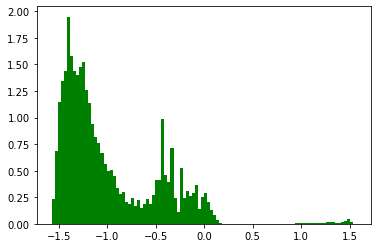

In [ ]:
plt.hist(dataset['attitude.pitch'], bins=100, density=True, histtype= 'bar', color='green')
plt.show()

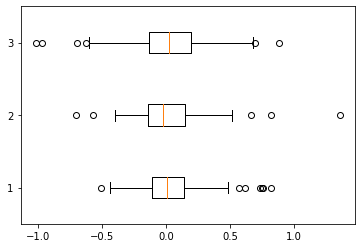

In [ ]:
plt.boxplot([dataset['userAcceleration.x'].head(100),dataset['userAcceleration.y'].head(100),dataset['userAcceleration.z'].head(100)], vert=False) 
plt.show()

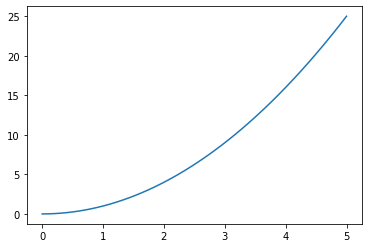

In [ ]:
plt.plot(np.linspace(0,5,50),np.linspace(0,5,50)**2)

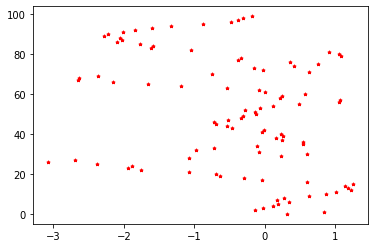

In [ ]:
fig, ax = plt.subplots()
ax.scatter(dataset['rotationRate.x'].head(100),np.arange(100), marker='*', s=10, c='red')
plt.show()

# Seaborn

Seaborn é uma biblioteca de visualização de dados baseada no matplotlib. Além de apresentar belos gráficos e opções mais ricas do que o matplotlib, o seaborn também contém conjuntos de dados que podem ser facilmente acessados.

    conda install seaborn 
    pip install seaborn

In [ ]:
import seaborn as sns
#%matplotlib inline

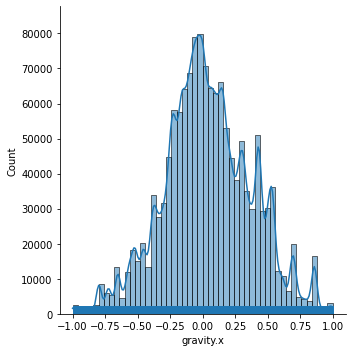

In [ ]:
sns.displot(dataset['gravity.x'], bins=50, kde=True, rug=True)

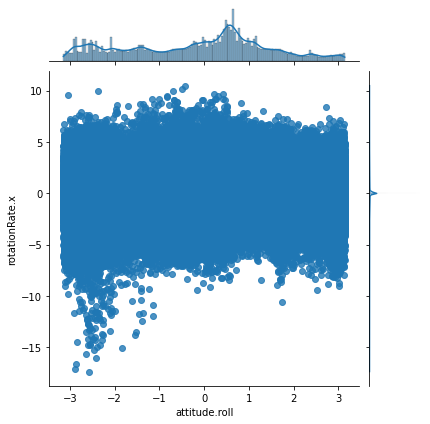

In [ ]:
sns.jointplot(x='attitude.roll' , y='rotationRate.x', data=dataset, kind='reg')

In [ ]:
dataset.corr()

,attitude.roll,attitude.pitch,attitude.yaw,userAcceleration.x,userAcceleration.y,userAcceleration.z,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,act,id,weight,height,age,gender,trial
attitude.roll,1.000000,-0.008417,0.017047,-0.079108,0.007383,0.073120,0.682112,0.009173,-0.374688,-0.021892,0.022204,0.003358,-0.104089,-0.129933,0.044205,0.031507,0.097258,-0.042635,-0.006721
attitude.pitch,-0.008417,1.000000,0.037675,-0.016154,-0.044897,-0.013751,0.136070,-0.983422,-0.244585,-0.002187,-0.030682,0.004559,0.440428,-0.021811,0.034409,0.057693,0.049841,0.036533,0.046936
attitude.yaw,0.017047,0.037675,1.000000,0.009080,0.007242,-0.020024,-0.024678,-0.025428,-0.014253,-0.003644,0.009259,0.000307,-0.078125,0.016956,0.059698,-0.025187,-0.014352,-0.048675,-0.045895
userAcceleration.x,-0.079108,-0.016154,0.009080,1.000000,-0.027857,-0.195180,-0.096749,0.011316,0.081662,-0.029773,-0.040523,0.052625,0.006332,-0.028864,0.003438,0.012456,0.033830,0.021079,-0.003935
userAcceleration.y,0.007383,-0.044897,0.007242,-0.027857,1.000000,-0.091643,0.011480,0.038874,0.007330,0.083562,0.022076,-0.011267,-0.046315,0.005470,0.021621,0.028240,0.004113,0.026780,0.019373
userAcceleration.z,0.073120,-0.013751,-0.020024,-0.195180,-0.091643,1.000000,0.040323,0.032657,-0.171881,0.012560,-0.010754,-0.020189,-0.054984,0.012892,0.002450,-0.003384,-0.020685,0.006137,0.037559
gravity.x,0.682112,0.136070,-0.024678,-0.096749,0.011480,0.040323,1.000000,-0.120730,-0.483044,-0.015998,0.011300,0.003233,0.059679,-0.189102,0.126464,0.069530,0.101497,-0.040802,0.017977
gravity.y,0.009173,-0.983422,-0.025428,0.011316,0.038874,0.032657,-0.120730,1.000000,0.225295,0.001441,0.021970,0.000126,-0.465451,0.006301,-0.027055,-0.066709,-0.032022,-0.034802,-0.054088
gravity.z,-0.374688,-0.244585,-0.014253,0.081662,0.007330,-0.171881,-0.483044,0.225295,1.000000,-0.005921,0.023905,-0.052830,-0.096048,0.026671,-0.063423,-0.060177,-0.104389,-0.091793,-0.034306
rotationRate.x,-0.021892,-0.002187,-0.003644,-0.029773,0.083562,0.012560,-0.015998,0.001441,-0.005921,1.000000,-0.159804,0.400865,-0.000775,-0.000007,-0.002130,-0.000709,-0.000733,0.001022,0.003596


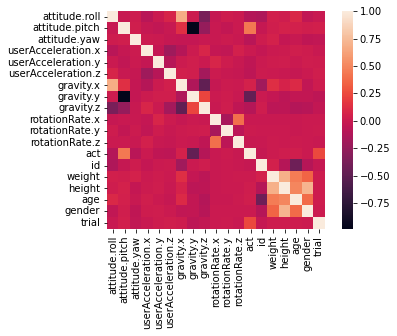

In [ ]:
sns.heatmap(dataset.corr(),annot=False,square=True)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412865 entries, 0 to 1412864
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   attitude.roll       1412865 non-null  float64
 1   attitude.pitch      1412865 non-null  float64
 2   attitude.yaw        1412865 non-null  float64
 3   userAcceleration.x  1412865 non-null  float64
 4   userAcceleration.y  1412865 non-null  float64
 5   userAcceleration.z  1412865 non-null  float64
 6   gravity.x           1412865 non-null  float64
 7   gravity.y           1412865 non-null  float64
 8   gravity.z           1412865 non-null  float64
 9   rotationRate.x      1412865 non-null  float64
 10  rotationRate.y      1412865 non-null  float64
 11  rotationRate.z      1412865 non-null  float64
 12  act                 1412865 non-null  float64
 13  id                  1412865 non-null  float64
 14  weight              1412865 non-null  float64
 15  height         

# SenSplit

This python package helps to splits a sensor dataset (in Pandas DataFrame format) into train and test sets.

https://github.com/mmalekzadeh/sensplit

In [ ]:
!pip install sensplit

In [ ]:
dataset.columns

Index(['attitude.roll', 'attitude.pitch', 'attitude.yaw', 'userAcceleration.x',
       'userAcceleration.y', 'userAcceleration.z', 'gravity.x', 'gravity.y',
       'gravity.z', 'rotationRate.x', 'rotationRate.y', 'rotationRate.z',
       'act', 'id', 'weight', 'height', 'age', 'gender', 'trial'],
      dtype='object')

### Splitting

Treinamento e teste / Features e Labels
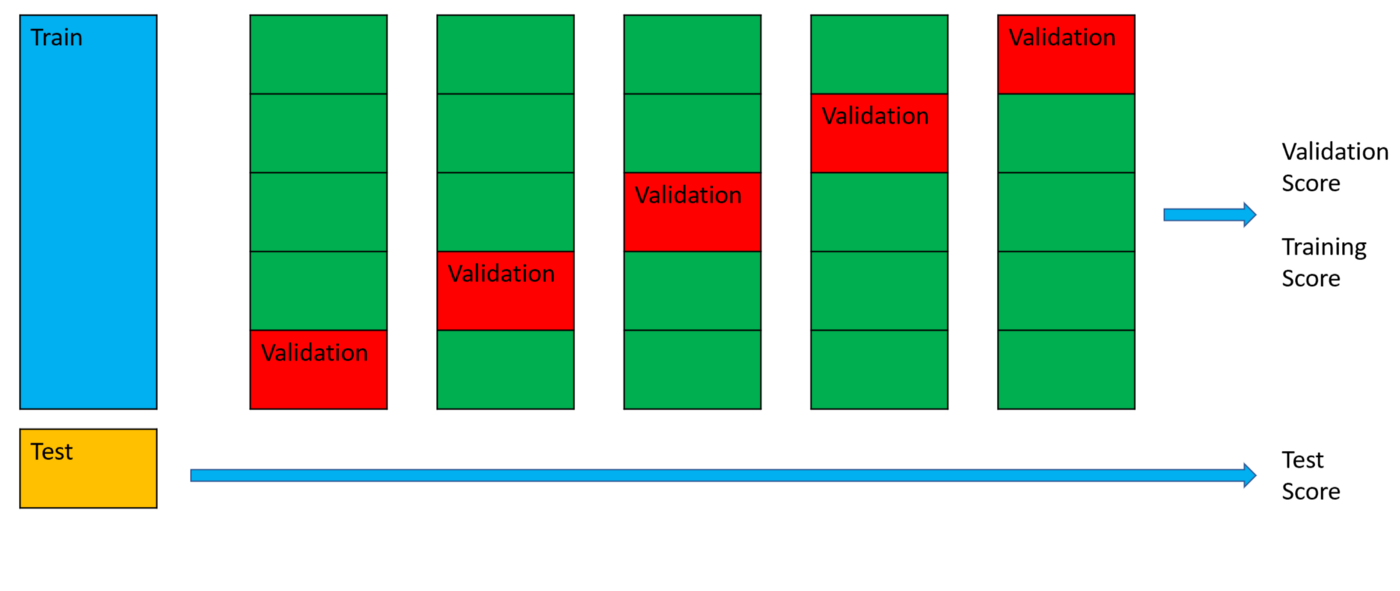


In [ ]:
sorted(dataset['trial'].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0]

Os dados de treinamento e teste de cada usuário (id) serão divididos em:



*  Train (trial<10)
*  Test ( trial>10)



**labels = ("id","trial").**

In [ ]:
from sensplit.dataframe_splitter import DataFrameSplitter
dfs = DataFrameSplitter(method="trials")

train_data, test_data = dfs.train_test_split(dataset = dataset,
                                             labels = ("id","trial"), 
                                             trial_col='trial', 
                                             train_trials=[1.,2.,3.,4.,5.,6.,7.,8.,9.],
                                             verbose=2)
train_data.shape, test_data.shape

((1081446, 19), (331419, 19))

In [ ]:
Features = dataset.columns[:-7]
labels_or_info = dataset.columns[-7:]
print("Features are {} \n Labels or Info are {}".format(Features, labels_or_info))


Features are Index(['attitude.roll', 'attitude.pitch', 'attitude.yaw', 'userAcceleration.x',
       'userAcceleration.y', 'userAcceleration.z', 'gravity.x', 'gravity.y',
       'gravity.z', 'rotationRate.x', 'rotationRate.y', 'rotationRate.z'],
      dtype='object') 
 Labels or Info are Index(['act', 'id', 'weight', 'height', 'age', 'gender', 'trial'], dtype='object')


In [ ]:
#Esses dados devem ser usados para treinamento e teste da rede com dados brutos
x_train = train_data[Features]
y_train = train_data[labels_or_info]

x_test = test_data[Features]
y_test = test_data[labels_or_info]

print("Train: x={}, y={}\nTest:  x={}, y={}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Train: x=(1081446, 12), y=(1081446, 7)
Test:  x=(331419, 12), y=(331419, 7)


In [ ]:
dataset_name = "MotionSense" 
x_train.to_csv(dataset_name+"_x_train.csv", index=False)
x_test.to_csv(dataset_name+"_x_test.csv", index=False)
y_train.to_csv(dataset_name+"_y_train.csv", index=False)
y_test.to_csv(dataset_name+"_y_test.csv", index=False)

# Explorando os Dados 

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1081446 entries, 0 to 2842
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   attitude.roll       1081446 non-null  float64
 1   attitude.pitch      1081446 non-null  float64
 2   attitude.yaw        1081446 non-null  float64
 3   userAcceleration.x  1081446 non-null  float64
 4   userAcceleration.y  1081446 non-null  float64
 5   userAcceleration.z  1081446 non-null  float64
 6   gravity.x           1081446 non-null  float64
 7   gravity.y           1081446 non-null  float64
 8   gravity.z           1081446 non-null  float64
 9   rotationRate.x      1081446 non-null  float64
 10  rotationRate.y      1081446 non-null  float64
 11  rotationRate.z      1081446 non-null  float64
dtypes: float64(12)
memory usage: 107.3 MB


In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1081446 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   act     1081446 non-null  float64
 1   id      1081446 non-null  float64
 2   weight  1081446 non-null  float64
 3   height  1081446 non-null  float64
 4   age     1081446 non-null  float64
 5   gender  1081446 non-null  float64
 6   trial   1081446 non-null  float64
dtypes: float64(7)
memory usage: 66.0 MB


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331419 entries, 0 to 789
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   attitude.roll       331419 non-null  float64
 1   attitude.pitch      331419 non-null  float64
 2   attitude.yaw        331419 non-null  float64
 3   userAcceleration.x  331419 non-null  float64
 4   userAcceleration.y  331419 non-null  float64
 5   userAcceleration.z  331419 non-null  float64
 6   gravity.x           331419 non-null  float64
 7   gravity.y           331419 non-null  float64
 8   gravity.z           331419 non-null  float64
 9   rotationRate.x      331419 non-null  float64
 10  rotationRate.y      331419 non-null  float64
 11  rotationRate.z      331419 non-null  float64
dtypes: float64(12)
memory usage: 32.9 MB


In [ ]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331419 entries, 0 to 789
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   act     331419 non-null  float64
 1   id      331419 non-null  float64
 2   weight  331419 non-null  float64
 3   height  331419 non-null  float64
 4   age     331419 non-null  float64
 5   gender  331419 non-null  float64
 6   trial   331419 non-null  float64
dtypes: float64(7)
memory usage: 20.2 MB


### Verificando Outliers 

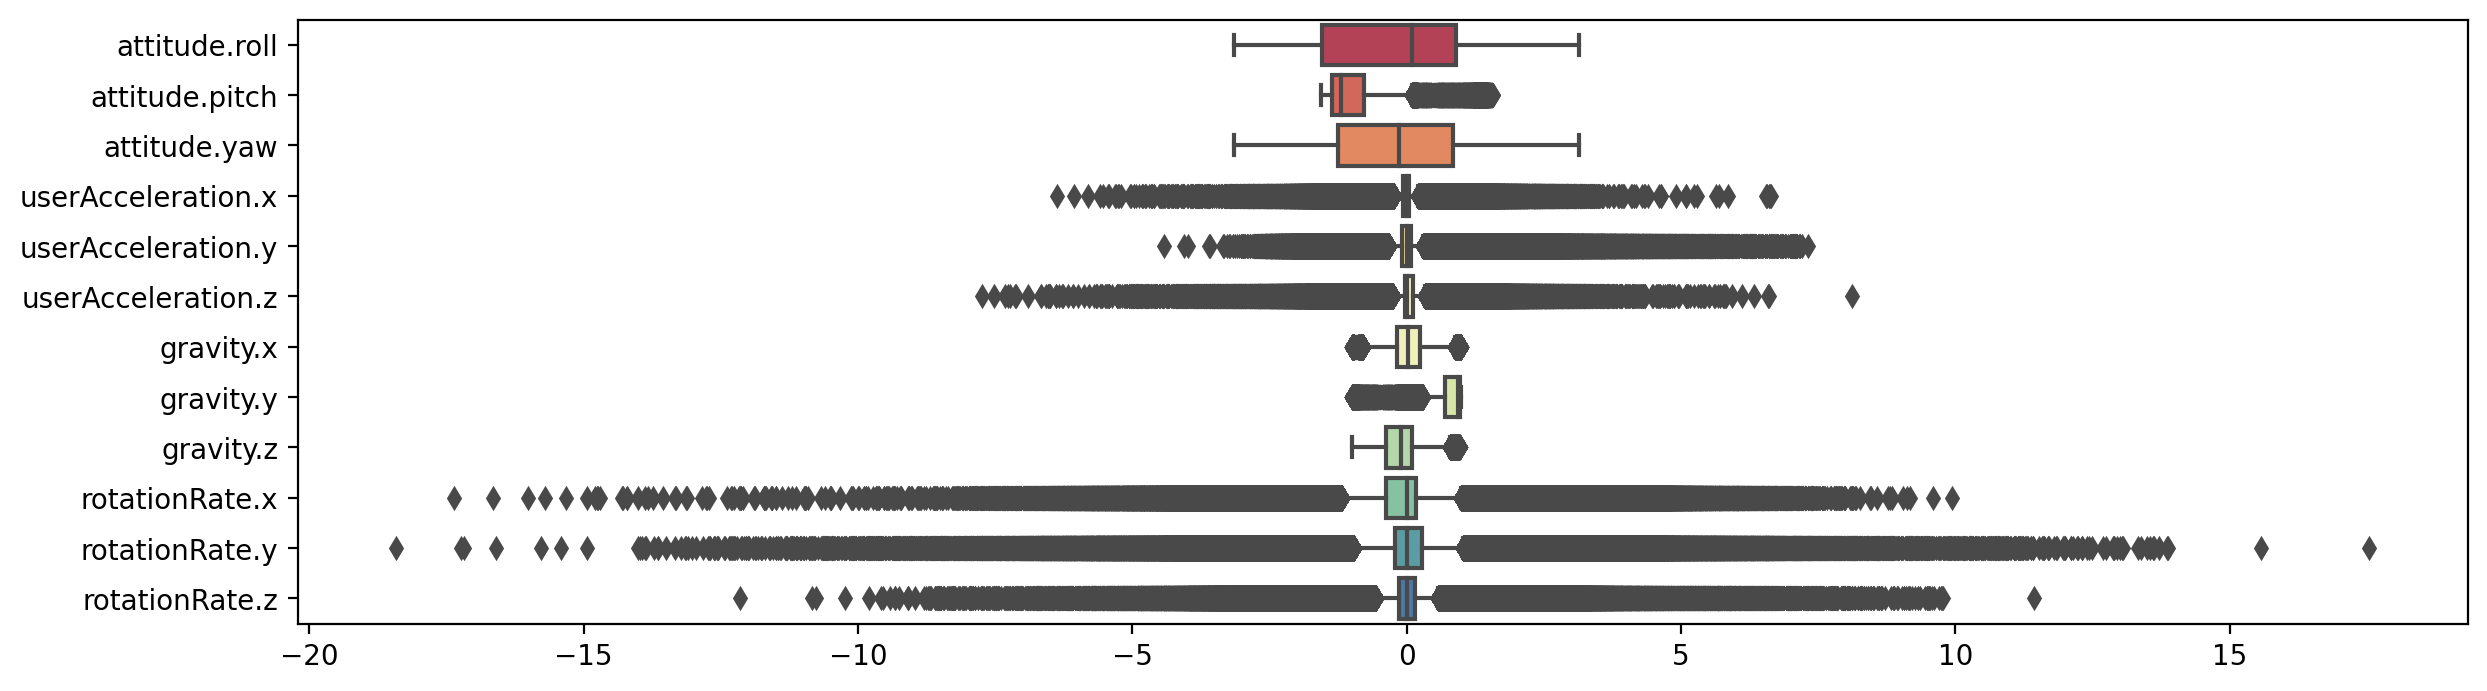

In [ ]:
fig, axes = plt.subplots(figsize=(14,4),dpi=200)
axes=sns.boxplot(data=x_train, palette="Spectral", orient='h')
#ax.set_yticklabels(['','',''])
plt.show()

## Nomalização / Padronização

A **Padronização** de conjuntos de dados é um requisito comum para muitos estimadores de aprendizado de máquina.

In [ ]:
from sklearn import preprocessing
ss_scale= preprocessing.StandardScaler().fit(x_train)
X_ss_scale = ss_scale.transform(x_train)
X_ss_scale

array([[ 1.07602056,  0.65158694,  0.53384195, ...,  0.23657363,
         0.61127008,  1.29924572],
       [ 1.0759324 ,  0.6891132 ,  0.52176734, ...,  0.63409871,
         0.32750626,  0.76553712],
       [ 1.07578946,  0.71127964,  0.5173482 , ..., -0.10766522,
        -0.04566467,  0.40096039],
       ...,
       [-0.77020453,  0.16878115, -1.02730395, ..., -2.11154597,
        -0.18224407, -8.29725764],
       [-0.83332609,  0.40748537, -1.10408122, ..., -2.00513169,
        -0.60935622, -6.56874124],
       [-0.86241214,  0.62291793, -1.14369645, ..., -1.40357243,
         0.7899479 , -5.61319151]])

In [ ]:
X_ss_scale.shape

(1081446, 12)

In [ ]:
x_train.shape

(1081446, 12)

In [ ]:
ss_df= pd.DataFrame(data=X_ss_scale,index=x_train.index,columns=x_train.columns)


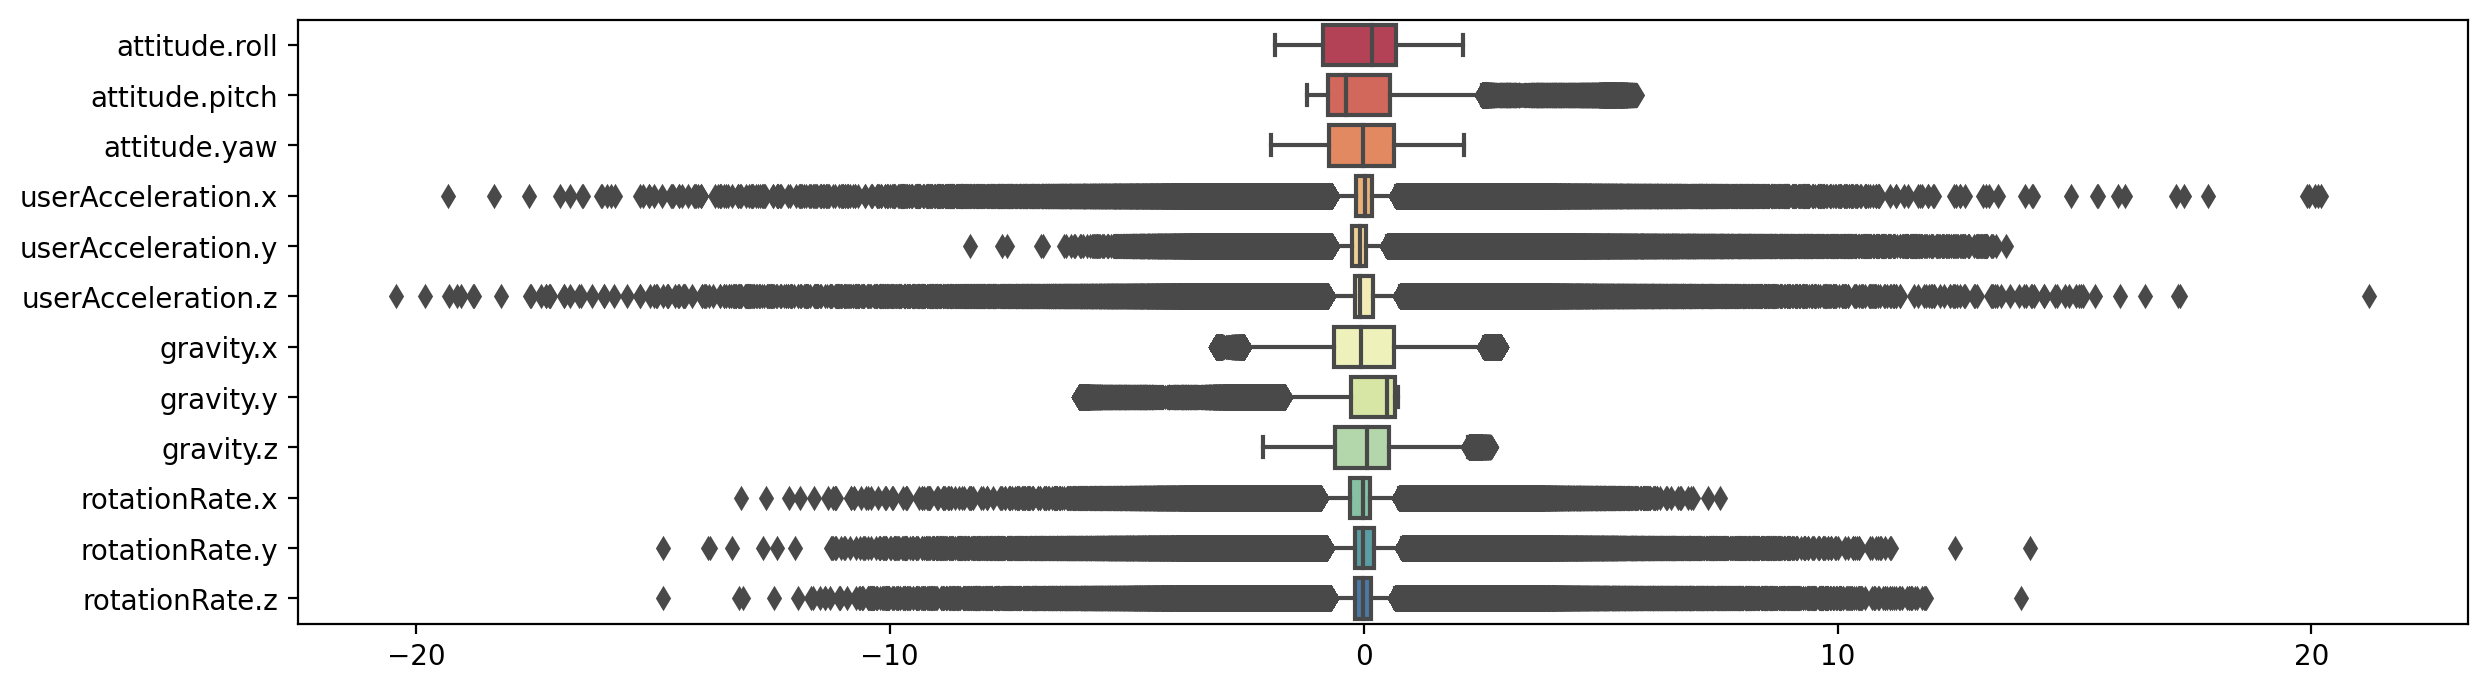

In [ ]:
fig, axes = plt.subplots(figsize=(14,4),dpi=200)
axes=sns.boxplot(data=ss_df, palette="Spectral", orient='h')
#ax.set_yticklabels(['','',''])
plt.show()

**Dados de Treinamento e Teste Padronizados**

In [ ]:
#Esses dados devem ser usados para treinamento e teste da rede com dados padronizados 
x_train_ss = X_ss_scale.copy()
ss= preprocessing.StandardScaler().fit(x_test)
x_test_ss = ss.transform(x_test)


## Normalização 

A **Normalização** é o processo de dimensionar amostras individuais para ter norma unitária . 

Normas l1, l2, ou max

In [ ]:
nor_df = preprocessing.normalize(x_train,norm='l2')
nor_df

array([[ 0.59935833, -0.287846  ,  0.27312847, ...,  0.12422982,
         0.30521491,  0.42467773],
       [ 0.64146056, -0.30099561,  0.28452871, ...,  0.35349028,
         0.17818508,  0.27017638],
       [ 0.72266572, -0.33442574,  0.31737426, ..., -0.06534461,
        -0.01927137,  0.16251269],
       ...,
       [-0.15794742, -0.107054  , -0.19237605, ..., -0.31348393,
        -0.02374095, -0.76671828],
       [-0.2212664 , -0.12415134, -0.2689443 , ..., -0.38919876,
        -0.10937195, -0.79323709],
       [-0.25646593, -0.12355411, -0.31254154, ..., -0.30616112,
         0.16559316, -0.76194069]])

In [ ]:
nor_df.shape

(1081446, 12)

In [ ]:
nor_df= pd.DataFrame(data=nor_df,index=x_train.index,columns=x_train.columns)


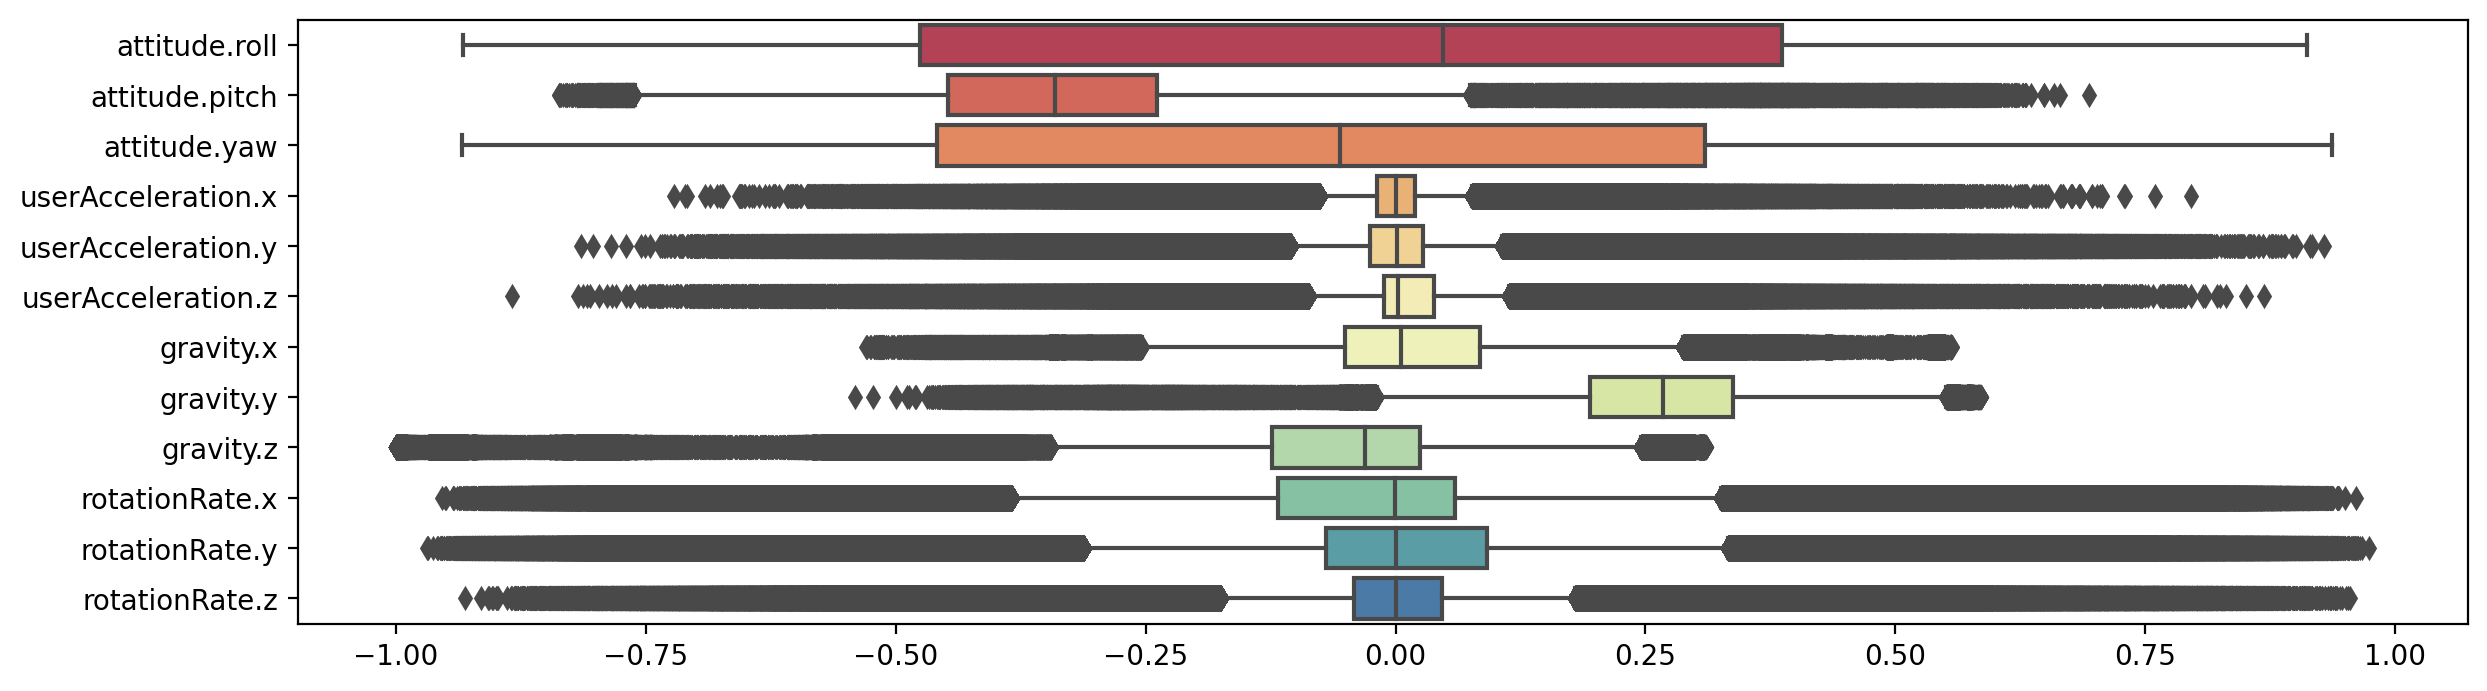

In [ ]:
fig, axes = plt.subplots(figsize=(14,4),dpi=200)
axes=sns.boxplot(data=nor_df, palette="Spectral", orient='h')

plt.show()

In [ ]:
#Esses dados devem ser usados para treinamento e teste da rede com dados normalizados 
x_train_nor = nor_df.copy()
x_test_nor= preprocessing.normalize(x_test,norm='l2')

# Redução de dimensionalidade utilizando o PCA

PCA é uma técnica para reduzir o número de dimensões em um conjunto de dados enquanto retém a maioria das informações. Ele está usando a correlação entre algumas dimensões e tenta fornecer um número mínimo de variáveis ​​que mantenha a quantidade máxima de variação ou informações sobre como os dados originais são distribuídos. Ele não faz isso usando suposições, mas usando matemática robusta e usa algo conhecido como autovalores e autovetores da matriz de dados. Esses autovetores da matriz de covariância têm a propriedade de apontar ao longo das principais direções de variação dos dados. Essas são as direções de variação máxima em um conjunto de dados.


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
x_train.shape

(1081446, 12)

In [ ]:
x_train.columns

Index(['attitude.roll', 'attitude.pitch', 'attitude.yaw', 'userAcceleration.x',
       'userAcceleration.y', 'userAcceleration.z', 'gravity.x', 'gravity.y',
       'gravity.z', 'rotationRate.x', 'rotationRate.y', 'rotationRate.z'],
      dtype='object')

In [ ]:
pca = PCA(n_components=6)
pca_result = pca.fit_transform(x_train.values)


In [ ]:
print('Variação explicada por componente principal: {}'.format(pca.explained_variance_ratio_))

Variação explicada por componente principal: [0.26195368 0.23770487 0.20470869 0.14163727 0.05190581 0.03159439]


In [ ]:
print('Variação explicada Total: {}'.format(sum(pca.explained_variance_ratio_)))

Variação explicada Total: 0.9295047177195279


Text(0, 0.5, 'cumulative explained variance')

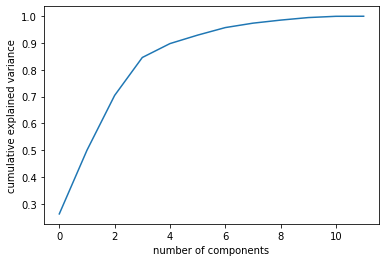

In [ ]:
pca = PCA(n_components=12)
pca.fit_transform(x_train.values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
print(x_train.shape)
print(pca_result.shape)

(1081446, 12)
(1081446, 6)


## Explicando componentes pela variância



In [ ]:
pca = PCA(n_components=0.95)
pca.fit_transform(x_train.values)

array([[ 1.8632876 ,  0.55755602, -0.41970146, ..., -0.88578968,
         0.30968745, -0.11577137],
       [ 1.79853552,  0.53298788, -0.89347608, ..., -0.28577849,
         0.26426721,  0.07140286],
       [ 1.85656296,  0.52609356, -0.21109545, ..., -0.33453515,
         0.1905342 ,  0.24503605],
       ...,
       [-1.13462673, -1.33930604,  4.30149545, ...,  5.85850197,
        -0.98851709,  3.29454788],
       [-1.37038997, -1.43994913,  3.59023998, ...,  4.25293223,
        -0.19287739,  1.21641506],
       [-1.41597223, -1.45875001,  3.51275933, ...,  3.84039784,
        -0.2003318 ,  1.50827796]])

In [ ]:
print('Variação explicada Total: {}'.format(sum(pca.explained_variance_ratio_)))

Variação explicada Total: 0.9576774577214674


In [ ]:
pca.n_components_

7

In [ ]:
pca = PCA(n_components=7)
pca_result = pca.fit_transform(x_train.values)

In [ ]:
print('Variação 95% / 7 comp: {}'.format(sum(pca.explained_variance_ratio_)))

Variação 95% / 7 comp: 0.9576774577214662


In [ ]:
#Esses dados devem ser usados para treinamento e teste da rede com PCA
x_train_pca = pca_result.copy()
pca = PCA(n_components=7)
x_test_pca = pca.fit_transform(x_test.values)


# LDA

Um classificador com um limite de decisão linear, gerado ajustando densidades condicionais de classe aos dados e usando a regra de Bayes.

O modelo ajusta uma densidade gaussiana para cada classe, assumindo que todas as classes compartilham a mesma matriz de covariância.


## PCA vs LDA

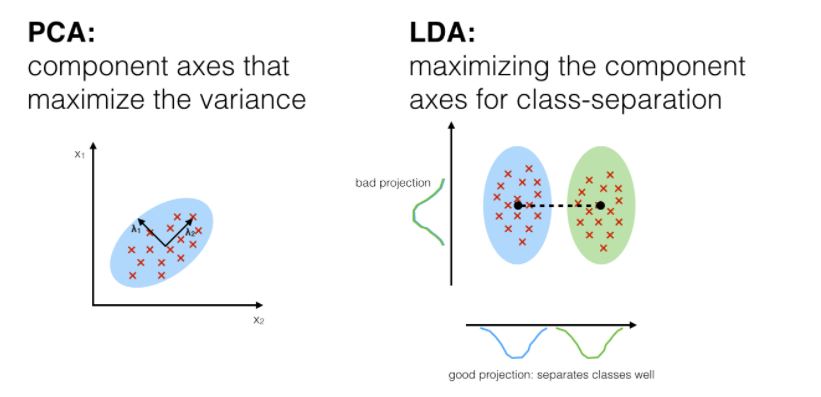

https://sebastianraschka.com/Articles/2014_python_lda.html#lda-via-scikit-learn
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

In [ ]:
print(x_train.shape)

(1081446, 12)


In [ ]:
print(y_train.nunique())


act        6
id        24
weight    17
height    15
age       13
gender     2
trial      9
dtype: int64


In [ ]:
print(y_train['act'].nunique())

6


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
lda_result = lda.fit_transform(x_train, y_train['act'])

In [ ]:
print('Variação explicada por componente principal: {}'.format(lda.explained_variance_ratio_))

Variação explicada por componente principal: [0.90410448 0.06937732]


In [ ]:
print('Variação explicada Total: {}'.format(sum(lda.explained_variance_ratio_)))

Variação explicada Total: 0.9734817926822134


Text(0, 0.5, 'cumulative explained variance')

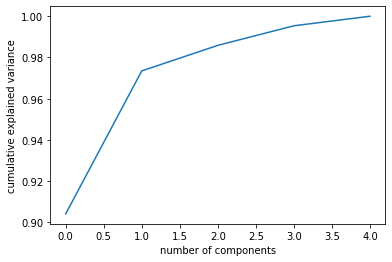

In [ ]:
lda = LDA(n_components=5)
lda.fit_transform(x_train.values,y_train['act'].values)
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
print(x_train.shape)
print(lda_result.shape)

(1081446, 12)
(1081446, 2)


In [ ]:
#Esses dados devem ser usados para treinamento e teste da rede com LDA
x_train_lda = lda_result.copy()
lda = LDA(n_components=2)
x_test_lda = lda.fit_transform(x_test, y_test['act'])


# Dados que serão usados na DNN

In [ ]:
# Labels para todos
y_train
y_test
print("Labels Shapes: Train {} | Test {}".format(y_train.shape,y_test.shape))
# Bruto
x_train
x_test
print("Bruto Shapes: Train {} | Test {}".format(x_train.shape,x_test.shape))
# Padronizado
x_train_ss
x_test_ss
print("Padronizado Shapes: Train {} | Test {}".format(x_train_ss.shape,x_test_ss.shape))
# Normalizado
x_train_nor
x_test_nor
print("Normalizado Shapes: Train {} | Test {}".format(x_train_nor.shape,x_test_nor.shape))
# PCA
x_train_pca
x_test_pca
print("PCA Shapes: Train {} | Test {}".format(x_train_pca.shape,x_test_pca.shape))
# LDA
x_train_lda
x_test_lda
print("LDA Shapes: Train {} | Test {}".format(x_train_lda.shape,x_test_lda.shape))


Labels Shapes: Train (1081446, 7) | Test (331419, 7)
Bruto Shapes: Train (1081446, 12) | Test (331419, 12)
Padronizado Shapes: Train (1081446, 12) | Test (331419, 12)
Normalizado Shapes: Train (1081446, 12) | Test (331419, 12)
PCA Shapes: Train (1081446, 7) | Test (331419, 7)
LDA Shapes: Train (1081446, 2) | Test (331419, 2)
